In [ ]:
! pip install -q kaggle

from google.colab import files

files.upload()

! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

! kaggle datasets download -d dumitrux/architectural-styles-dataset

! unzip architectural-styles-dataset

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [ ]:
dir_path1= '/content/architectural-styles-dataset/Russian Revival architecture'
dir_path2='/content/architectural-styles-dataset/American Foursquare architecture'

In [ ]:
import cv2
import os

# Function to load images from a directory
def load_images_from_folder(folder):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        img = cv2.resize(img, (350, 350))
        if img is not None:
            images.append(img)
            labels.append(folder.split('/')[-1])
    return images, labels



# Load images from directories with appropriate labels
Russian_Revival_images, Russian_Revival_labels = load_images_from_folder(dir_path1) #, 'Russian Revival architecture')
American_Foursquare_images, American_Foursquare_labels = load_images_from_folder(dir_path2) #, 'American Foursquare architecture')

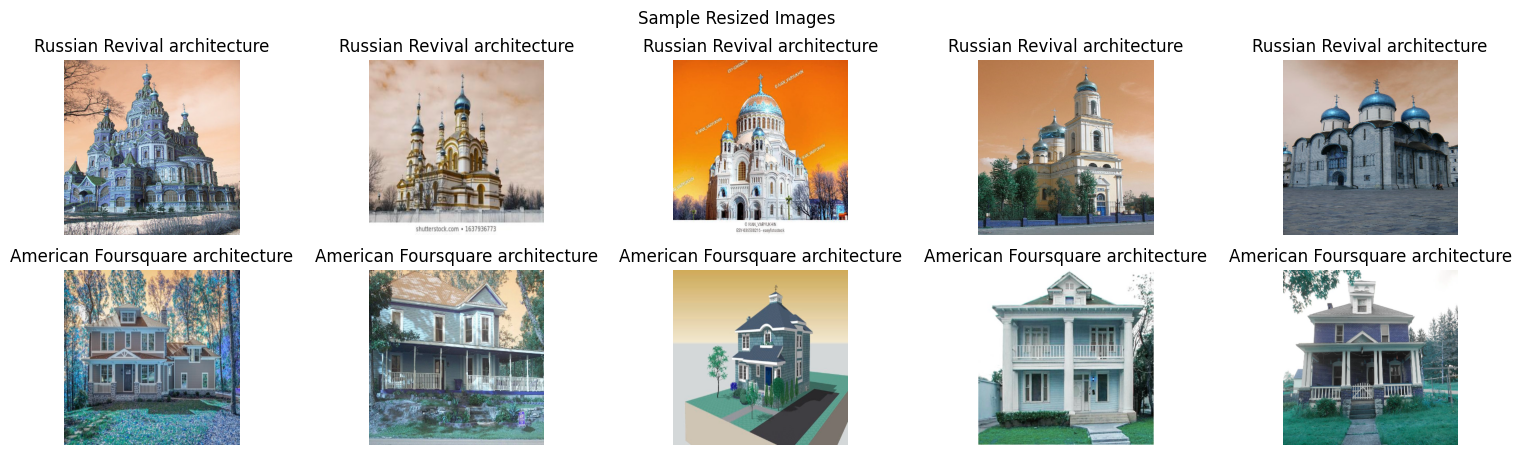

In [ ]:
import matplotlib.pyplot as plt

# Function to display images from both classes to check if we have loaded them successfully
def show_sample_images(class_1_images, class_2_images, num_images=5):
    fig, axes = plt.subplots(2, num_images, figsize=(19, 5))
    fig.suptitle('Sample Resized Images')

    for i in range(num_images):
        axes[0, i].imshow(class_1_images[i])
        axes[0, i].set_title(Russian_Revival_labels[i])
        axes[0, i].axis('off')

        axes[1, i].imshow(class_2_images[i])
        axes[1, i].set_title(American_Foursquare_labels[i])
        axes[1, i].axis('off')

# Display sample images from both classes
show_sample_images(Russian_Revival_images,American_Foursquare_images)
plt.show()

In [ ]:
for i in range(5):
  print('Russian_Revival_images '+ str(i)+' Size :',Russian_Revival_images[i].shape, end='')
  print('   American_Foursquare_images'+ str(i)+' Size :',American_Foursquare_images[i].shape)

Russian_Revival_images 0 Size : (350, 350, 3)   American_Foursquare_images0 Size : (350, 350, 3)
Russian_Revival_images 1 Size : (350, 350, 3)   American_Foursquare_images1 Size : (350, 350, 3)
Russian_Revival_images 2 Size : (350, 350, 3)   American_Foursquare_images2 Size : (350, 350, 3)
Russian_Revival_images 3 Size : (350, 350, 3)   American_Foursquare_images3 Size : (350, 350, 3)
Russian_Revival_images 4 Size : (350, 350, 3)   American_Foursquare_images4 Size : (350, 350, 3)


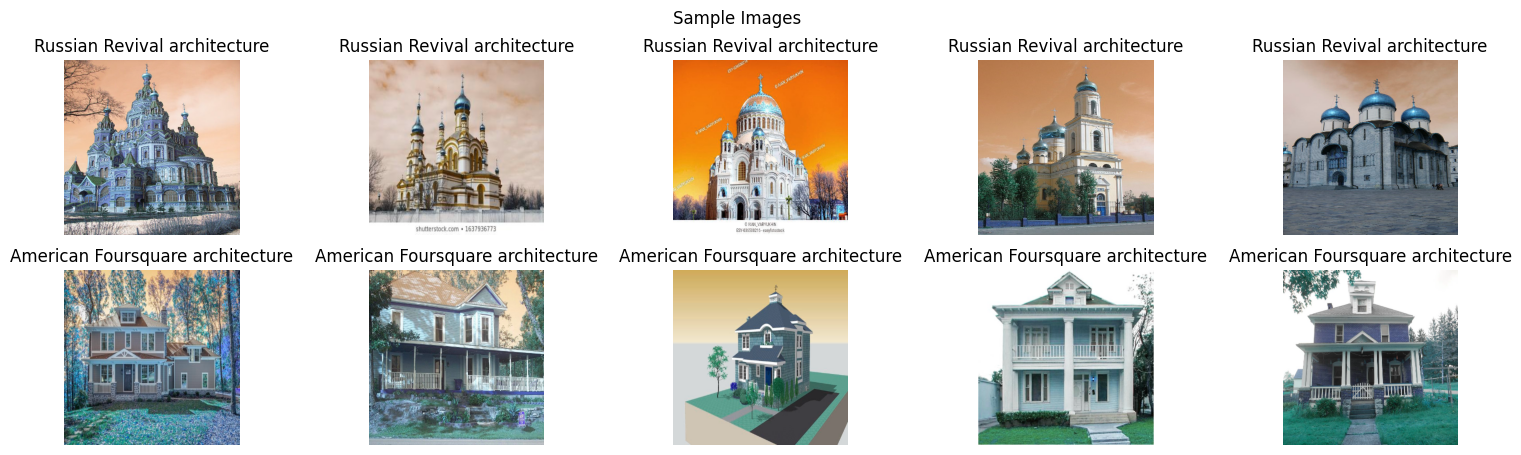

In [ ]:
# Function to display images from both classes to check if we have loaded them successfully
def show_sample_images(class_1_images, class_2_images, num_images=5):
    fig, axes = plt.subplots(2, num_images, figsize=(19, 5))
    fig.suptitle('Sample Images')

    for i in range(num_images):
        axes[0, i].imshow(class_1_images[i])
        axes[0, i].set_title(Russian_Revival_labels[i])
        axes[0, i].axis('off')

        axes[1, i].imshow(class_2_images[i])
        axes[1, i].set_title(American_Foursquare_labels[i])
        axes[1, i].axis('off')

# Display sample images from both classes
show_sample_images(Russian_Revival_images,American_Foursquare_images)
plt.show()

In [ ]:
print(len(Russian_Revival_images))
print(len(American_Foursquare_images))
print('shape',Russian_Revival_images[90].shape)


352
362
shape (350, 350, 3)


**Merging of two classes**


In [ ]:
img_two_classes_merged = Russian_Revival_images + American_Foursquare_images
labels_two_classes_merged = Russian_Revival_labels + American_Foursquare_labels

print(len(img_two_classes_merged))

714


In [ ]:
import cv2
from skimage.feature import hog

# Function to convert images to grayscale
def convert_to_gray(images):
    gray_images = [cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in images]
    return gray_images


In [ ]:
# Convert images to grayscale
Russian_Revival_gray_images = convert_to_gray(Russian_Revival_images)
American_Foursquare_gray_images = convert_to_gray(American_Foursquare_images)


In [ ]:
img_two_classes_merged_gray=convert_to_gray(img_two_classes_merged)

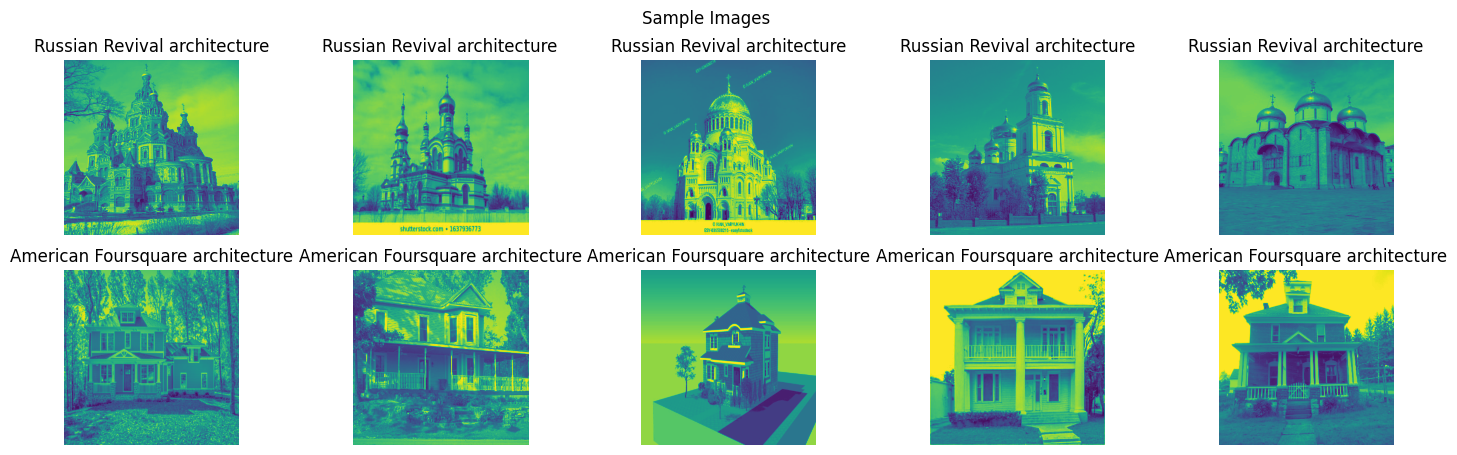

In [ ]:
import matplotlib.pyplot as plt

# Function to display images from both classes to check if we have loaded them successfully
def show_sample_images(class_1_images, class_2_images, num_images=5):
    fig, axes = plt.subplots(2, num_images, figsize=(18, 5))
    fig.suptitle('Sample Images')

    for i in range(num_images):
        axes[0, i].imshow(class_1_images[i])
        axes[0, i].set_title(Russian_Revival_labels[i])
        axes[0, i].axis('off')

        axes[1, i].imshow(class_2_images[i])
        axes[1, i].set_title(American_Foursquare_labels[i])
        axes[1, i].axis('off')

# Display sample images from both classes
show_sample_images(class_1_images=Russian_Revival_gray_images, class_2_images=American_Foursquare_gray_images)
plt.show()

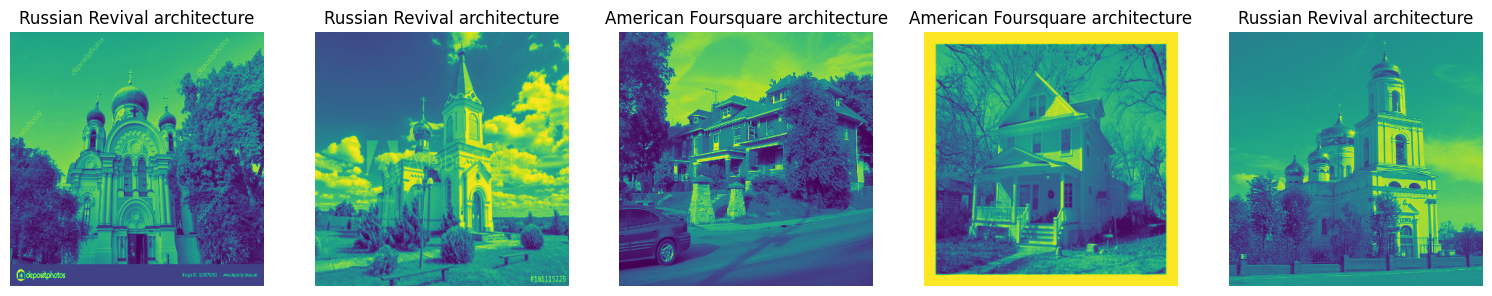

In [ ]:
import random
random_indices = random.sample(range(len(img_two_classes_merged_gray)), 5)

# Display the 5 images
plt.figure(figsize=(19, 8))
for i, idx in enumerate(random_indices):
    plt.subplot(1, 5, i+1)
    plt.imshow(img_two_classes_merged_gray[idx] )
    plt.axis('off')
    plt.title(labels_two_classes_merged[idx])
plt.show()

**Extracting SIFT**      Scale-Invariant Feature Transform




In [ ]:
def extract_sift_features(images):
    sift = cv2.SIFT_create()
    sift_features = []
    for img in images:
        # Detect keypoints and compute SIFT descriptors
        keypoints, descriptors = sift.detectAndCompute(img, None)
        sift_features.append(descriptors)
    return sift_features


In [ ]:
merged_sift_features = extract_sift_features(img_two_classes_merged_gray)

In [ ]:
merged_sift_features[0]

array([[158.,  20.,   0., ...,   1.,   0.,   1.],
       [  7.,  14.,   6., ...,  13.,   6.,   4.],
       [ 11.,  45.,  65., ...,   0.,   0.,   2.],
       ...,
       [ 44.,  25.,   0., ...,   0.,   0.,   0.],
       [ 22.,  69., 115., ...,   0.,   0.,   0.],
       [ 15.,  13.,  20., ...,   0.,   0.,   0.]], dtype=float32)

**Extracting HOG features**

In [ ]:
def extract_hog_features(images):
    hog_features = []
    for img in images:
        # Calculate HOG features and visualize
        hog_feature, hog_image = hog(img, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True)
        hog_features.append(hog_feature)
    return hog_features

In [ ]:
merged_hog_features = extract_hog_features(img_two_classes_merged_gray)

In [ ]:
merged_hog_features

[array([0.12652659, 0.17559278, 0.06954934, ..., 0.1719225 , 0.1112955 ,
        0.01604759]),
 array([0.20362019, 0.12603724, 0.16150974, ..., 0.26315789, 0.        ,
        0.        ]),
 array([0.29548495, 0.082801  , 0.17149221, ..., 0.        , 0.        ,
        0.        ]),
 array([0.2575852 , 0.11161667, 0.2575852 , ..., 0.09794483, 0.01099495,
        0.        ]),
 array([0.10030297, 0.        , 0.05673993, ..., 0.20663424, 0.0272791 ,
        0.03192937]),
 array([0.26561011, 0.03214946, 0.10166553, ..., 0.16020451, 0.02082841,
        0.27291665]),
 array([0.35004657, 0.        , 0.04032324, ..., 0.04521323, 0.01237729,
        0.02738198]),
 array([0.24047244, 0.04021863, 0.06388688, ..., 0.18285094, 0.14627002,
        0.14804797]),
 array([0.39435249, 0.        , 0.08839007, ..., 0.12374199, 0.15601031,
        0.22858955]),
 array([0.26611127, 0.07504893, 0.16612787, ..., 0.08314562, 0.        ,
        0.06769455]),
 array([0.28952268, 0.03326574, 0.08053393, ..., 0

**Extracting Hu features**

In [ ]:
# Function to calculate Hu Moments for a given image
def calculate_hu_moments(image):

    # Convert the image to binary (if needed)
    _, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)

    # Calculate moments
    moments = cv2.moments(binary_image)

    # Calculate Hu Moments
    hu_moments = cv2.HuMoments(moments)
    # Log scale transform to make them more invariant to image transformations
    hu_moments = -1 * np.sign(hu_moments) * np.log10(np.abs(hu_moments))

    return hu_moments.flatten()  # Flatten the array to a 1D vector

# Assuming you have a list of resized color images called img_two_classes_merged_gray
hu_moments_data = []
for color_image in img_two_classes_merged_gray:
    hu_moments = calculate_hu_moments(color_image)
    hu_moments_data.append(hu_moments)

# Convert the lists to numpy arrays for further processing
hu_moments_data = np.array(hu_moments_data)


In [ ]:
hu_moments_data

array([[  3.00078857,   7.76677759,  10.7566151 , ...,  21.44139685,
        -15.04187776,  21.75736339],
       [  3.06678311,   9.60992255,  11.42402114, ...,  22.5979912 ,
        -16.1448878 , -22.91012034],
       [  2.98909021,   7.56272896,   9.53368023, ...,  23.02326456,
        -15.97089697, -23.45855956],
       ...,
       [  2.79308686,   7.15412889,   9.98507547, ..., -19.79659433,
         13.53459853, -19.65006667],
       [  2.87839254,   7.35611314,   9.85043935, ..., -19.7690012 ,
         13.47599216,  19.21293155],
       [  2.82718205,   6.64133642,  10.30740861, ..., -20.17312781,
        -13.35148583,  20.13688617]])

EXTRACTING **local_binary_pattern** texture features

In [ ]:
from skimage.feature import local_binary_pattern

# Function to extract Local Binary Patterns (LBP) features
def extract_lbp_features(images):
    lbp_features = []
    for img in images:
        # Calculate LBP features
        radius = 3
        n_points = 8 * radius
        lbp = local_binary_pattern(img, n_points, radius, method='uniform')
        hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))
        hist = hist.astype("float")
        hist /= (hist.sum() + 1e-7)
        lbp_features.append(hist)
    return lbp_features


In [ ]:
# Extract LBP features for merged grayscale images
merged_lbp_features = extract_lbp_features(img_two_classes_merged_gray)

In [ ]:
merged_lbp_features

In [ ]:
# from sklearn.model_selection import train_test_split

# def train_test(features,test_size=0.2):
#   # Split the data into training and testing sets
#   X_train, X_test, y_train, y_test = train_test_split(features, labels_two_classes_merged, test_size=0.2, random_state=42)

# **Hu Training and Testing**

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train_hu, X_test_hu, y_train_hu, y_test_hu = train_test_split(hu_moments_data, labels_two_classes_merged, test_size=0.2, random_state=42)


SVM classification based on kernel

In [ ]:
from sklearn.svm import SVC

# Initialize SVM classifier
svm_classifier_hu = SVC(kernel='linear')

# Train the classifier
svm_classifier_hu.fit(X_train_hu, y_train_hu)


SVC(kernel='linear')

In [ ]:
predicted_labels_hu = svm_classifier_hu.predict(X_test_hu)

accuracy_hu = accuracy_score(y_test_hu, predicted_labels_hu)
print("Accuracy hu:", accuracy_hu)

Accuracy hu: 0.6853146853146853


In [ ]:
report_hu = classification_report(y_test_hu, predicted_labels_hu)
print(report_hu)

                                  precision    recall  f1-score   support

American Foursquare architecture       0.62      0.78      0.69        64
    Russian Revival architecture       0.77      0.61      0.68        79

                        accuracy                           0.69       143
                       macro avg       0.70      0.69      0.69       143
                    weighted avg       0.70      0.69      0.68       143



**LBP Training And Testing**

In [ ]:
X_train_lbp, X_test_lbp, y_train_lbp, y_test_lbp = train_test_split(merged_lbp_features, labels_two_classes_merged, test_size=0.2, random_state=42)

In [ ]:
# Initialize SVM classifier
svm_classifier_lbp = SVC(kernel='linear')

# Train the classifier using LBP features
svm_classifier_lbp.fit(X_train_lbp, y_train_lbp)

SVC(kernel='linear')

In [ ]:
predicted_labels_lbp = svm_classifier_lbp.predict(X_test_lbp)

accuracy_lbp = accuracy_score(y_test_lbp, predicted_labels_lbp)
print("Accuracy LBP:", accuracy_lbp)

Accuracy LBP: 0.6433566433566433


In [ ]:
from sklearn.metrics import classification_report

report_lbp = classification_report(y_test_lbp, predicted_labels_lbp)

print(report_lbp)

                                  precision    recall  f1-score   support

American Foursquare architecture       0.57      0.84      0.68        64
    Russian Revival architecture       0.79      0.48      0.60        79

                        accuracy                           0.64       143
                       macro avg       0.68      0.66      0.64       143
                    weighted avg       0.69      0.64      0.63       143



**HOG Training And Tets**

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train_hog, X_test_hog, y_train_hog, y_test_hog = train_test_split(merged_hog_features, labels_two_classes_merged, test_size=0.2, random_state=42)


SVM classification based on kernel

In [ ]:
from sklearn.svm import SVC

# Initialize SVM classifier
svm_classifier_hog = SVC(kernel='linear')

# Train the classifier
svm_classifier_hog.fit(X_train_hog, y_train_hog)


SVC(kernel='linear')

In [ ]:
# Predict labels for the test set
predicted_labels_hog = svm_classifier_hog.predict(X_test_hog)

# Evaluate accuracy
from sklearn.metrics import accuracy_score

accuracy_hog = accuracy_score(y_test_hog, predicted_labels_hog)
print("Accuracy HOG :", accuracy_hog)

Accuracy HOG : 0.965034965034965


In [ ]:
from sklearn.metrics import classification_report


# Generate a classification report
report_hog = classification_report(y_test_hog, predicted_labels_hog)

# Print the classification report
print(report_hog)

                                  precision    recall  f1-score   support

American Foursquare architecture       0.95      0.97      0.96        64
    Russian Revival architecture       0.97      0.96      0.97        79

                        accuracy                           0.97       143
                       macro avg       0.96      0.97      0.96       143
                    weighted avg       0.97      0.97      0.97       143

